In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
# import pynance as pn
import yfinance as yf


In [2]:
# Load data
df = pd.read_csv("../data/GOOG.csv")

# Parse dates and sort
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Preview data
df.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852


In [3]:
#Calculate Technical Indicators (SMA, RSI, MACD)

# SMA
df["SMA_20"] = SMAIndicator(close=df["Close"], window=20).sma_indicator()
df["SMA_50"] = SMAIndicator(close=df["Close"], window=50).sma_indicator()

# RSI
df["RSI"] = RSIIndicator(close=df["Close"], window=14).rsi()

# MACD
macd = MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["MACD_Signal"] = macd.macd_signal()
df["MACD_Diff"] = macd.macd_diff()

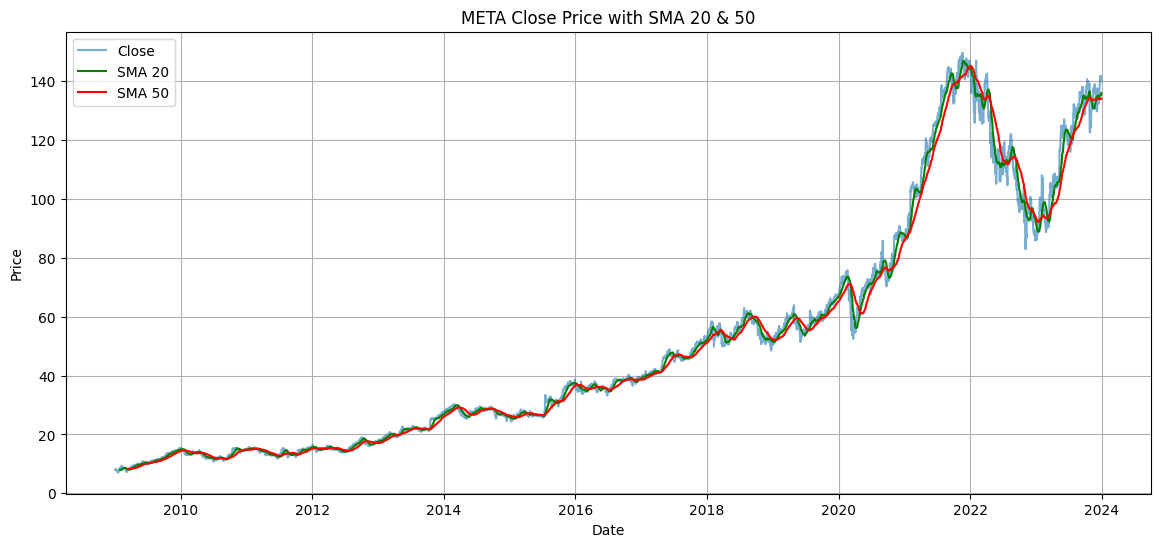

In [4]:
# Visualize Indicators
# Plot 1: Price + Moving Averages

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
plt.plot(df["Date"], df["SMA_20"], label="SMA 20", color="green")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50", color="red")
plt.title("META Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

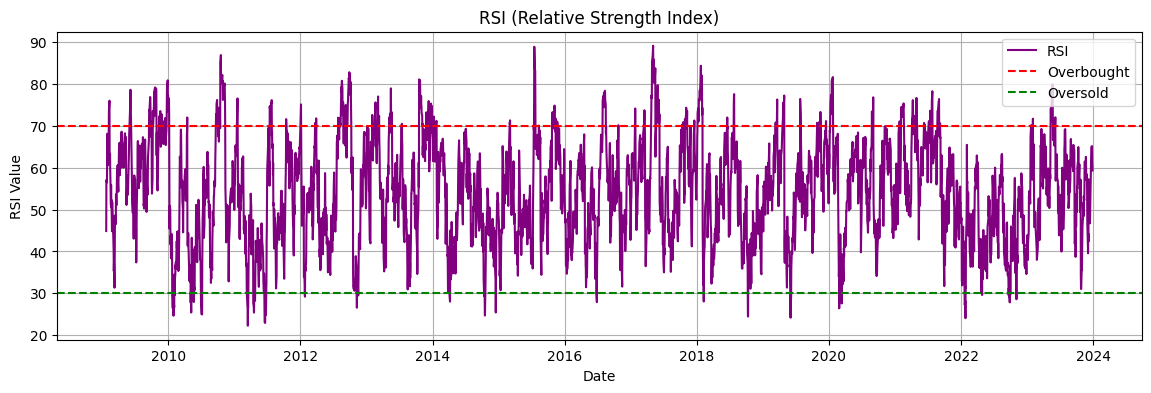

In [5]:
#RSI

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle='--', color='red', label="Overbought")
plt.axhline(30, linestyle='--', color='green', label="Oversold")
plt.title("RSI (Relative Strength Index)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

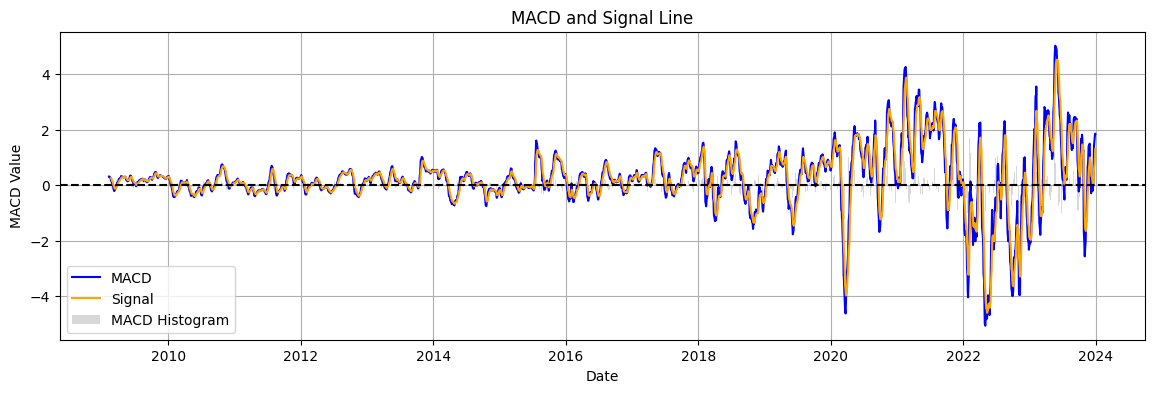

In [6]:
#Plot 3: MACD

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["MACD"], label="MACD", color="blue")
plt.plot(df["Date"], df["MACD_Signal"], label="Signal", color="orange")
plt.bar(df["Date"], df["MACD_Diff"], label="MACD Histogram", color="gray", alpha=0.3)
plt.axhline(0, linestyle="--", color="black")
plt.title("MACD and Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid(True)
plt.show()